# Lab Two: Exploring Image Data

Team: Miro Ronac, Kirk Watson, Brandon Vincitore

## 1. Business Understanding 

This data can be useful in identifying pneumonia in pediatric patients and assisting doctors with making accurate observations from X-rays.

In the Guangzhou Women and Children’s Medical Center, "chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old. All chest X-ray imaging was performed as part of patients’ routine clinical care." To ensure quality of the dataset, the "images were graded by two expert physicians." This data was collected to allow engineers to train an AI system that can efficiently identify pneumonia in pediatric patients.

Ultimately, the ability to identify a patient with pneumonia with increased efficiency and accuracy is the intention of analyzing this dataset. With this capability, a pneumonia diagnosis can be reached at a faster rate compared to when a human makes the diagnosis. Hospitals and clinicians with a high influx of patients (such as the Guangzhou Women and Children’s Medical Center) can make accurate diagnoses while not spending as much time observing X-rays utilizing this classifier. This can allow physicians to spend an alloted amount of time to care for a greater number of patients. In addition, medical practitioners can use this available time to examine other aspects of the X-ray or case of the patient.

To evaluate the success of a machine learning algorithm for this dataset, the classifier would have to at least peform as well as a human. [As per research published with the Radiological Society of North America](https://pubs.rsna.org/doi/full/10.1148/radiol.2020200823), humans can have a 94% success rate when identifying pneumonia in patients. If this is an easy threshold for our classifier to overcome, we can compare ourselves to other competitors. [A classifier made by Rohit Kundu and his partners](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0256630) had a success rate of 98.81%.


Dataset Source: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

## 2. Data Preparation

In [4]:
import os

import numpy as np

from PIL import Image
from numpy import asarray
from os import listdir
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
normal_dir = "chest_xray/train/NORMAL/"
pneumonia_dir = "chest_xray/train/PNEUMONIA/"

data = []
file_names = []
h, w = 100, 100

#load normal images
for images in os.listdir(normal_dir):
    #create image, resize to 100x100
    image = Image.open(normal_dir + images)
    image = image.resize((h,w))
    #convert image to numpy array and flatten
    data_i = asarray(image)
    feature_i = data_i.flatten()
    #add image to list of images
    data.append(feature_i)
    #extract file name
    _, fname = os.path.split(images)
    file_names.append(fname)
    
#load pneumonia images images
for images in os.listdir(pneumonia_dir):
    #create image, resize to 100x100
    image = Image.open(pneumonia_dir + images)
    image = image.resize((h,w))
    #convert image to numpy array and flatten
    data_i = asarray(image)
    feature_i = data_i.flatten()
    #add image to list of images
    data.append(feature_i)
    #extract file name
    _, fname = os.path.split(images)
    file_names.append(fname)
    
data = np.asarray(data)
print(data.shape[0], 'total images')
print('Number of file names:', len(file_names))

5216 total images
Number of file names: 5216


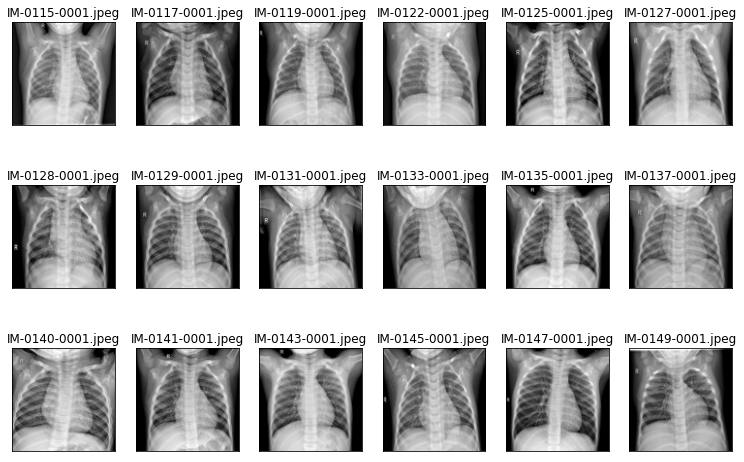

In [5]:
# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(data, file_names, h, w) # defaults to showing a 3 by 6 subset of the faces

## 3. Data Reduction

## 4. Exceptional Work